In [1]:
import sys
sys.path.insert(0, "/Users/aryakakodkar/Documents/qerasure/python")
sys.path.insert(1, "/Users/aryakakodkar/Documents/qerasure/build")

In [2]:
from qerasure import RotatedSurfaceCode

In [3]:
code = RotatedSurfaceCode(distance=5)

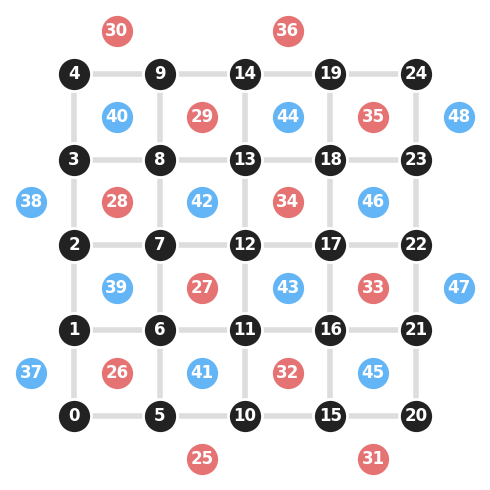

In [4]:
code.draw()